In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [23]:
img = cv2.imread('./HF.jpg', 0)
img

array([[15, 15, 15, ...,  5,  5,  5],
       [15, 15, 15, ...,  5,  5,  5],
       [15, 15, 15, ...,  5,  5,  5],
       ...,
       [ 6,  6,  7, ..., 11, 10, 10],
       [ 6,  6,  6, ..., 11, 10, 10],
       [ 6,  6,  7, ..., 12, 10,  9]], dtype=uint8)

In [38]:
gamma_h = 2.0
gamma_l = 0.5
c = 10
d0 = 30

In [39]:
# 对输入图像进行对数变换
gray_img = img.astype('float') / 255.0
img_log = np.log(gray_img + 1.0)

# 计算图像的傅里叶变换
img_fft = np.fft.fft2(img_log)

In [40]:
# 计算频率域中每个点的距离
u, v = np.meshgrid(np.arange(img_fft.shape[1]), np.arange(img_fft.shape[0]))
d_uv = np.sqrt((u - img_fft.shape[1]/2)**2 + (v - img_fft.shape[0]/2)**2)

In [41]:
# 计算同态滤波器函数
h_uv = (gamma_h - gamma_l) * (1 - np.exp(-c * (d_uv**2 / d0**2))) + gamma_l

In [42]:
# 将滤波器函数应用于频率域图像
img_fft_filt = h_uv * img_fft

In [43]:
# 计算滤波后的图像，并进行逆对数变换
img_filt = np.real(np.fft.ifft2(np.exp(np.fft.ifftshift(img_fft_filt))))
img_filt = np.uint8(np.round(np.expm1(img_filt) * 255))

/home/shannon/miniconda3/envs/Vision/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [49]:
# 中心化频率域图像
img_freq_centered = np.fft.fftshift(img_fft_filt)

# 进行逆傅里叶变换
img_space = np.fft.ifft2(img_freq_centered)

# 将实数部分提取出来（因为逆傅里叶变换得到的是复数图像）
img_space = np.real(img_space)

In [50]:
img_space

array([[ 0.11431409, -0.11431891,  0.11431345, ..., -0.03883887,
         0.03883235, -0.03883913],
       [-0.11431928,  0.1143128 , -0.11431584, ...,  0.03883196,
        -0.0388396 ,  0.03883297],
       [ 0.11431216, -0.11431602,  0.11430856, ..., -0.03884005,
         0.03883253, -0.03883931],
       ...,
       [-0.04651447,  0.04651102, -0.05416322, ...,  0.08445244,
        -0.07692909,  0.07692572],
       [ 0.0465106 , -0.04651562,  0.04651194, ..., -0.08446226,
         0.07692549, -0.07693299],
       [-0.04651615,  0.04651146, -0.05416373, ...,  0.0919622 ,
        -0.07693365,  0.0693673 ]])

In [52]:
res = np.exp(img_space)
res

array([[1.12110419, 0.89197345, 1.12110348, ..., 0.96190568, 1.03959618,
        0.96190544],
       [0.89197312, 1.12110275, 0.89197619, ..., 1.03959578, 0.96190498,
        1.03959683],
       [1.12110203, 0.89197603, 1.121098  , ..., 0.96190455, 1.03959637,
        0.96190527],
       ...,
       [0.95455075, 1.04760962, 0.94727748, ..., 1.08812109, 0.92595551,
        1.07996185],
       [1.04760919, 0.95454965, 1.04761059, ..., 0.91900634, 1.0799616 ,
        0.9259519 ],
       [0.95454914, 1.04761008, 0.94727699, ..., 1.09632338, 0.92595129,
        1.07182981]])

In [44]:


res = np.exp(img_space)
img_filt = np.uint8(np.round(np.expm1(res) * 255))

# # 显示空间域图像
# cv2.imshow('Spatial Domain Image', img_space)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [45]:
img_filt

array([[ 15, 111,  15, ..., 156, 210, 156],
       [111,  15, 111, ..., 210, 156, 210],
       [ 15, 111,  15, ..., 156, 210, 156],
       ...,
       [151, 216, 147, ..., 246, 133, 240],
       [216, 151, 216, ..., 128, 240, 133],
       [151, 216, 147, ..., 252, 133, 234]], dtype=uint8)

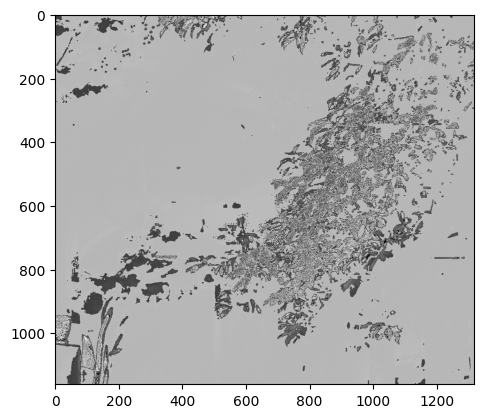

In [46]:
plt.imshow(img_filt,cmap='gray')